In [16]:
from IPython.display import Image as Img
from IPython.display import display

In [2]:
import config
config.configure_imports()

from Map import Map
from Node import Node
from DStarLite import DStarLite

from visualizer import *
from data_parser import *

In [7]:
lak105d_filename = '..\\data\\lak105d.map'
lak105d_scen_filename = '..\\data\\lak105d.map.scen'
den204d_filename = '..\\data\\den204d.map'
den204d_scen_filename = '..\\data\\den204d.map.scen'

In [4]:
def run_on(map_filename, start, finish, pixel_size = 20, gif_speed = 200):
    _map = Map()
    _map.read_from_string(*read_map(map_filename))

    d_star = DStarLite(_map, start, finish)
    d_star.run()

    gif_filename = f'd_star_{start.i}_{start.j}_{finish.i}_{finish.j}.gif'
    draw_path(_map, d_star._path, gif_filename, pixel_size, gif_speed)

    return Img(filename=gif_filename)

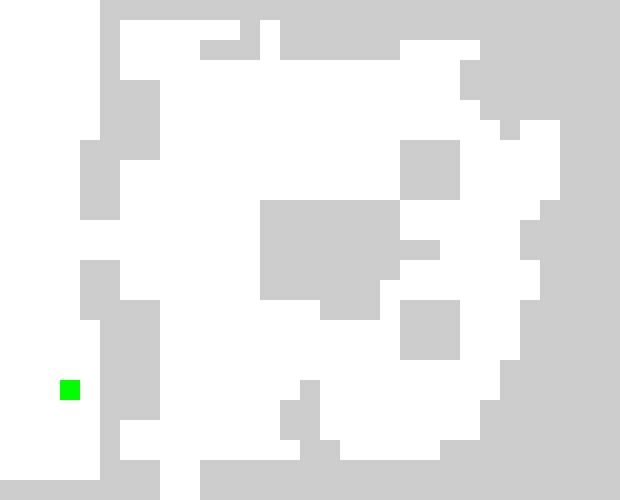

In [5]:
run_on(lak105d_filename, Node(8, 25), Node(19, 3))

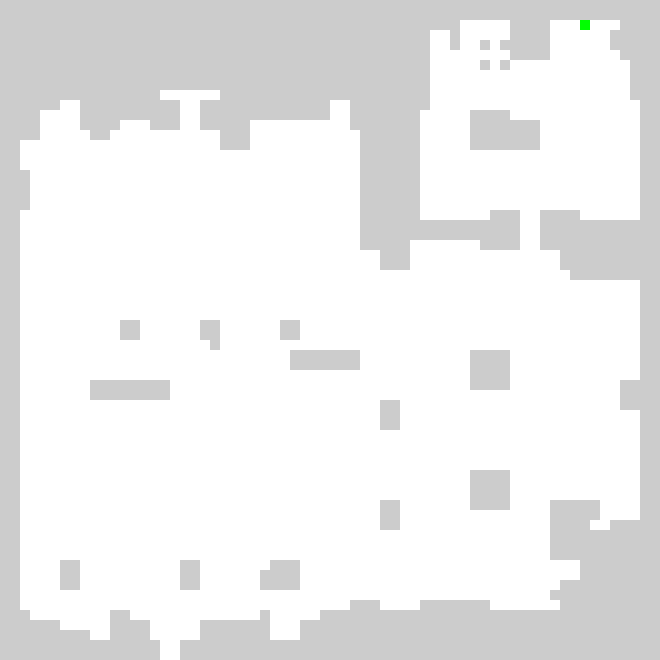

In [6]:
run_on(den204d_filename, Node(57, 13), Node(2, 58), 10, 100)

In [19]:
def massive_test(map_filename, scen_filename, n_tests = None, pixel_size = 20, gif_speed = 100):
    _map = Map()
    _map.read_from_string(*read_map(map_filename))
    tasks = read_map_scen(scen_filename, n_tests)
    images = []

    for start_i, start_j, goal_i, goal_j, _ in tasks:
        start = Node(start_i, start_j)
        finish = Node(goal_i, goal_j)
        d_star = DStarLite(_map, start, finish)
        d_star.run()

        gif_filename = f'd_star_{start.i}_{start.j}_{finish.i}_{finish.j}.gif'
        draw_path(_map, d_star._path, gif_filename, pixel_size, gif_speed)

        images.append( Img(filename=gif_filename) )

    return images

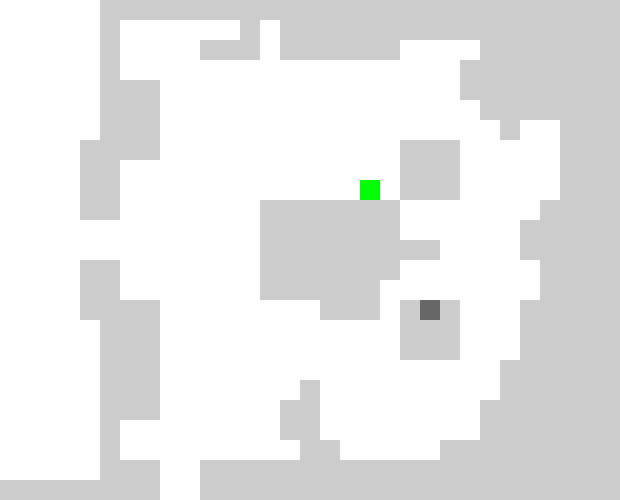

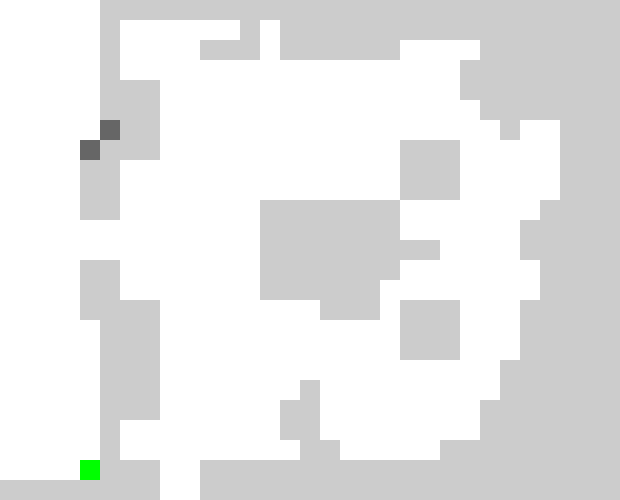

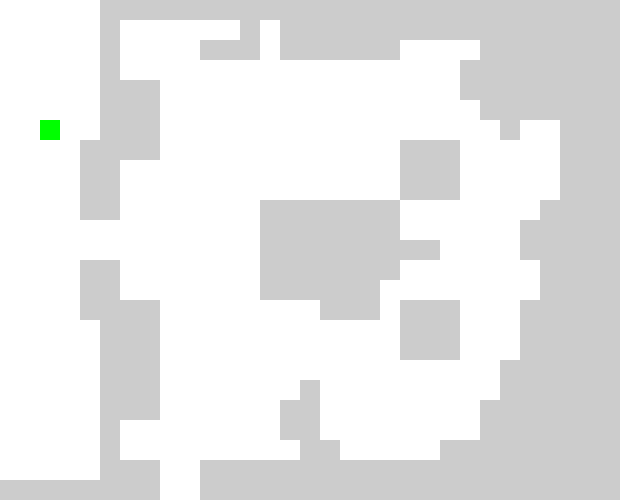

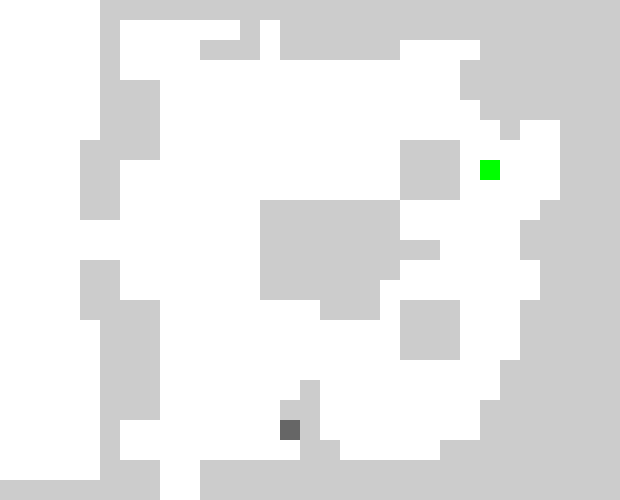

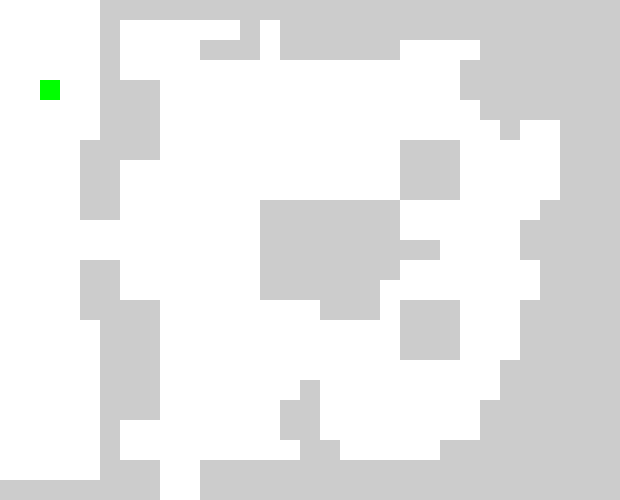

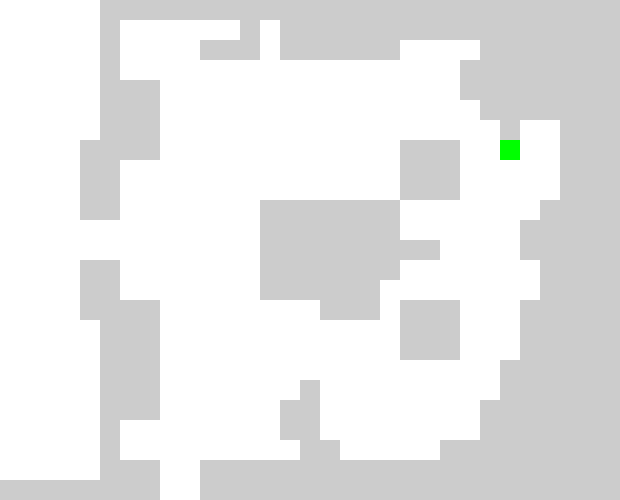

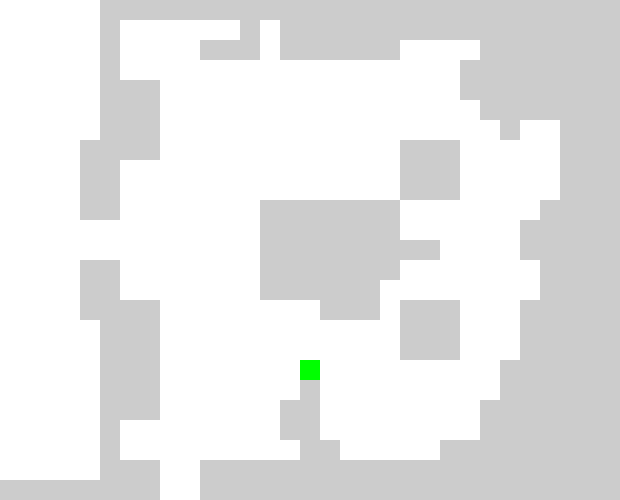

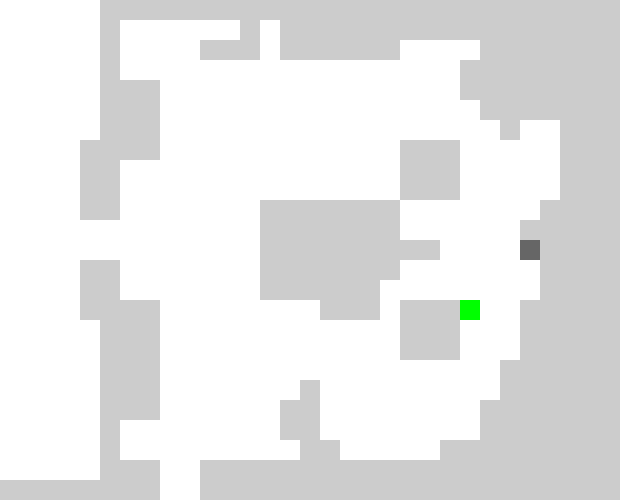

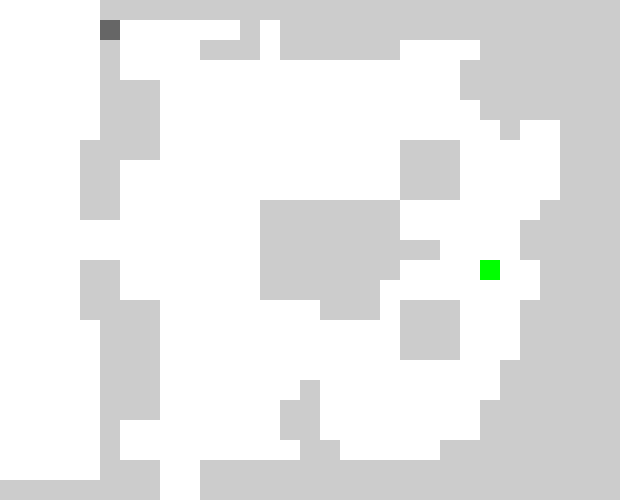

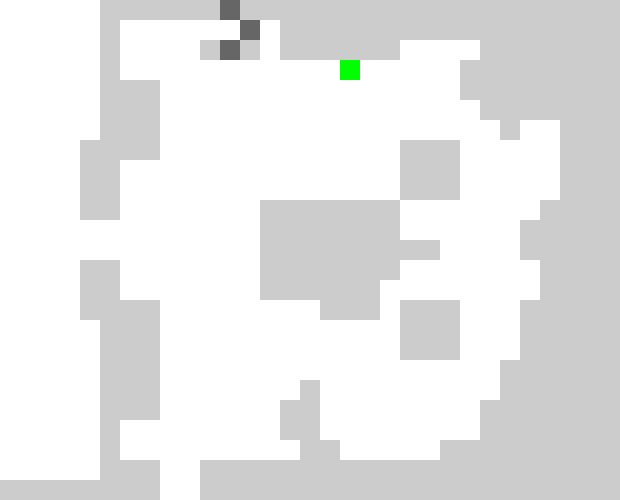

In [20]:
for im in massive_test(lak105d_filename, lak105d_scen_filename, 10):
    display(im)